In [3]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import math

**1**

In [4]:
spy = pd.read_csv("SPY.csv")
aapl = pd.read_csv("AAPL.csv")
jpm = pd.read_csv("JPM.csv")
spy.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-18,242.899994,244.190002,242.199997,242.710007,218.959900,136748000
1,2017-08-21,242.639999,243.199997,241.830002,242.899994,219.131302,65469700
2,2017-08-22,243.570007,245.619995,243.550003,245.440002,221.422806,63140100
3,2017-08-23,244.330002,245.050003,244.160004,244.559998,220.628860,50203800
4,2017-08-24,245.000000,245.179993,243.750000,243.990005,220.114639,50741700


<AxesSubplot:xlabel='Date'>

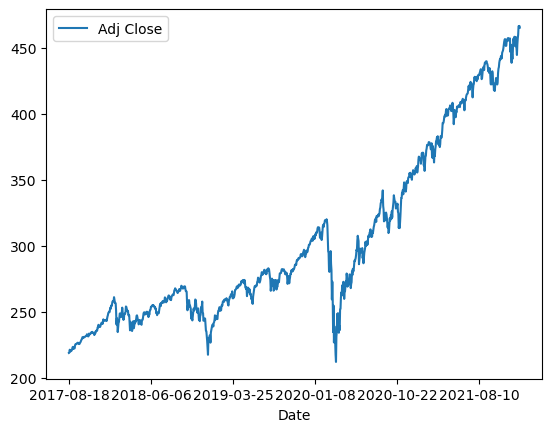

In [5]:
spy.plot(x='Date', y='Adj Close')

**2**

In [6]:
spy['Return'] = spy['Adj Close'].pct_change()
aapl['AAPL Return'] = aapl['Adj Close'].pct_change()
jpm['JPM Return'] = jpm['Adj Close'].pct_change()

In [7]:
print(spy['Return'].head())

0         NaN
1    0.000783
2    0.010457
3   -0.003586
4   -0.002331
Name: Return, dtype: float64


In [8]:
print(aapl['AAPL Return'].head())

0         NaN
1   -0.001841
2    0.016347
3    0.001252
4   -0.004438
Name: AAPL Return, dtype: float64


In [9]:
print(jpm['JPM Return'].head())

0         NaN
1   -0.001212
2    0.010261
3    0.001201
4   -0.001636
Name: JPM Return, dtype: float64


**3**

In [10]:
spy = spy.dropna()
aapl = aapl.dropna()
jpm = jpm.dropna()

In [11]:
X = spy['Return'].values.reshape(-1, 1)
Y = aapl['AAPL Return'].values.reshape(-1, 1)

print(X.shape)
print(Y.shape)

(1099, 1)
(1099, 1)


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X, Y)

LinearRegression()

In [15]:
print(f'intercept: {lr.intercept_}')
print(f'beta: {lr.coef_}')

intercept: [0.00067911]
beta: [[1.22942217]]


**4**

In [16]:
app = aapl['AAPL Return']
jp = jpm['JPM Return']

In [17]:
app = pd.DataFrame(app)
jp = pd.DataFrame(jp)

com = app.join(jp)

In [18]:
com

,AAPL Return,JPM Return
1,-0.001841,-0.001212
2,0.016347,0.010261
3,0.001252,0.001201
4,-0.004438,-0.001636
5,0.003705,0.004043
...,...,...
1095,0.003644,0.003574
1096,0.022975,0.005723
1097,-0.005767,0.003035
1098,0.000502,-0.000505


In [19]:
com['Type'] = ''

In [20]:
i = 0

for i in range(0, 1100):
    if i <= 100:
        com['Type'][i] = 'Historical'
        i=i+1
    else:
        com['Type'][i] = 'Future'
        i=i+1
        
com

C:\Users\Vivaan\AppData\Local\Temp\ipykernel_123172\4194595880.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com['Type'][i] = 'Historical'
C:\Users\Vivaan\AppData\Local\Temp\ipykernel_123172\4194595880.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com['Type'][i] = 'Historical'
C:\Users\Vivaan\AppData\Local\Temp\ipykernel_123172\4194595880.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com['Type'][i] = 'Future'


,AAPL Return,JPM Return,Type
1,-0.001841,-0.001212,Historical
2,0.016347,0.010261,Historical
3,0.001252,0.001201,Historical
4,-0.004438,-0.001636,Historical
5,0.003705,0.004043,Historical
...,...,...,...
1095,0.003644,0.003574,Future
1096,0.022975,0.005723,Future
1097,-0.005767,0.003035,Future
1098,0.000502,-0.000505,Future


In [21]:
hist = com[com['Type'] == 'Historical']
fut = com[com['Type'] == 'Future']

In [22]:
len(hist)

100

In [23]:
hist.describe()

,AAPL Return,JPM Return
count,100.000000,100.000000
mean,0.001161,0.002157
std,0.010529,0.009370
min,-0.025370,-0.023882
25%,-0.004492,-0.003486
50%,0.000117,0.001213
75%,0.006575,0.007643
max,0.035830,0.035025


**AAPL**

Mean = 0.116%
Std Dev = 1.053%

**JPM**

Mean = 0.216%
Std Dev = 0.937%

**5**

In [24]:
np.corrcoef(hist['AAPL Return'], hist['JPM Return'])

array([[1.        , 0.04787059],
       [0.04787059, 1.        ]])

**Correlation = 0.048**

**6**

In [25]:
mean_a = hist['AAPL Return'].mean()
mean_b = hist['JPM Return'].mean()
std_a = hist['AAPL Return'].std()
std_b = hist['JPM Return'].std()

In [26]:
mean_a

0.00116081196831341

In [27]:
np.corrcoef(fut['AAPL Return'], fut['JPM Return'])

array([[1.        , 0.45615266],
       [0.45615266, 1.        ]])

In [28]:
cor = 0.4561531

In [29]:
w1 = [0.2, 0.4, 0.6, 0.8]
w2 = [0.8, 0.6, 0.4, 0.2]

In [30]:
for i in range(0, 4):
    print(f'Portfoio Mean {(i+1)}: {(w1[i] * mean_a + w2[i] * mean_b)}')
    i=i+1

Portfoio Mean 1: 0.001957480059275436
Portfoio Mean 2: 0.0017583130365349292
Portfoio Mean 3: 0.001559146013794423
Portfoio Mean 4: 0.0013599789910539164


In [31]:
for i in range(0, 4):
    var1 = (w1[i])**2 * (std_a)**2
    var2 = (w2[i])**2 * (std_b)**2
    cov = 2 * (w1[i]) * (w2[i]) * (std_a) * (std_b) * (cor)
    var = var1 + var2 + cov
    print(f'Portfolio Std Dev {(i+1)}: {math.sqrt(var)}')
    i=i+1

Portfolio Std Dev 1: 0.00866153457715223
Portfolio Std Dev 2: 0.008422902931734935
Portfolio Std Dev 3: 0.008692567870546177
Portfolio Std Dev 4: 0.009427009514743893


**7**

In [32]:
print(f'Sharpe Ratio AAPL: {mean_a/std_a}')
print(f'Sharpe Ratio JPM: {mean_b/std_b}')

Sharpe Ratio AAPL: 0.1102446631971726
Sharpe Ratio JPM: 0.23017232176313032


In [33]:
for i in range(0,4):
    mean = (w1[i] * mean_a + w2[i] * mean_b)
    var1 = (w1[i])**2 + (std_a)**2
    var2 = (w2[i])**2 + (std_b)**2
    cov = 2 * (w1[i]) * (w2[i]) * (std_a) * (std_b) * (cor)
    var = var1 + var2 + cov
    std = math.sqrt(var)
    print(f'Portfolio Sharpe ratio {(i+1)}: {(mean/std)}')
    i=i+1

Portfolio Sharpe ratio 1: 0.002373421451431583
Portfolio Sharpe ratio 2: 0.0024378252140570674
Portfolio Sharpe ratio 3: 0.002161688724275751
Portfolio Sharpe ratio 4: 0.0016489584634943474
